In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
import tensorflow as tf
import os
from keras.callbacks import TensorBoard

from time import strftime

In [2]:
LOG_DIR = 'tensorboard_logs/'

In [3]:
x_train = cv2.imread('resized/b1.png',0)

In [4]:
x_train.shape

(28, 28)

In [5]:
x_train = x_train.reshape(1,784)

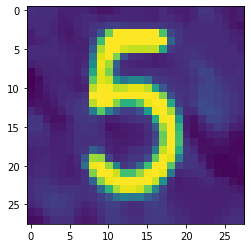

In [6]:
plt.imshow(x_train.reshape(28,28))
plt.show()

In [7]:
labels = pd.read_csv('labels.csv')

In [8]:
lis=[]
for i in range (1, 785):
    lis.append(i)

In [9]:
df = pd.DataFrame(data=x_train, columns=lis)

In [10]:
df

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,85,84,84,84,80,81,81,82,78,76,...,87,84,83,81,80,80,82,84,85,85


In [11]:
%%capture
for i in range (2, 577):
    x_train = cv2.imread('resized/b'+str(i)+'.png',0)
    x_train = x_train.reshape(1,784)
    df = df.append(pd.DataFrame(data=x_train, columns=lis));

In [13]:
df = df.reset_index()

In [14]:
df

,index,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,0,85,84,84,84,80,81,81,82,78,...,87,84,83,81,80,80,82,84,85,85
1,0,81,75,70,67,70,74,75,74,71,...,69,69,61,59,57,56,57,59,54,43
2,0,69,55,57,62,64,65,70,68,70,...,82,84,86,84,82,84,84,85,84,75
3,0,84,79,78,79,76,82,83,77,80,...,80,88,89,83,82,83,83,87,96,96
4,0,50,47,47,45,44,41,41,42,47,...,49,50,51,54,51,50,53,54,56,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,0,84,79,78,79,76,82,83,78,78,...,79,86,88,84,81,82,83,88,97,96
572,0,29,29,23,21,27,30,32,30,20,...,23,21,21,21,21,21,24,27,29,25
573,0,29,28,19,6,7,13,20,25,20,...,22,20,20,26,29,29,23,14,24,37
574,0,32,28,26,27,34,37,31,28,31,...,25,32,20,19,28,27,33,22,20,25


In [15]:
data = pd.concat([labels, df], axis=1)

In [16]:
del data['index']

In [17]:
data

,label,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,31,85,84,84,84,80,81,81,82,78,...,87,84,83,81,80,80,82,84,85,85
1,34,81,75,70,67,70,74,75,74,71,...,69,69,61,59,57,56,57,59,54,43
2,28,69,55,57,62,64,65,70,68,70,...,82,84,86,84,82,84,84,85,84,75
3,33,84,79,78,79,76,82,83,77,80,...,80,88,89,83,82,83,83,87,96,96
4,12,50,47,47,45,44,41,41,42,47,...,49,50,51,54,51,50,53,54,56,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,2,84,79,78,79,76,82,83,78,78,...,79,86,88,84,81,82,83,88,97,96
572,10,29,29,23,21,27,30,32,30,20,...,23,21,21,21,21,21,24,27,29,25
573,10,29,28,19,6,7,13,20,25,20,...,22,20,20,26,29,29,23,14,24,37
574,19,32,28,26,27,34,37,31,28,31,...,25,32,20,19,28,27,33,22,20,25


In [18]:
data.label.nunique()

30

In [19]:
letters_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',
             7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',
             14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',
             21:'V',22:'W',23:'X', 24:'Y',25:'Z', 26:0, 27:1, 
             28:2, 29:3, 30:4, 31:5, 32:6, 33:7, 34:8, 35:9}

In [20]:
# Split data to Features X and labels y
X = data.drop('label',axis = 1)
y = data.label
#get the shape of labels and features 
print(f'Features shape is :{X.shape}')
print(f'Shape of the class column is :{y.shape}')
#split into train and test set into 9:1 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, shuffle=True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

Features shape is :(576, 784)
Shape of the class column is :(576,)


((518, 784), (58, 784), (518,), (58,))

In [22]:
# scale data
scaler = MinMaxScaler()
scaler.fit(X_train)
#scaling data 
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

array([[0.05633803, 0.01408451, 0.07894737, ..., 0.24050633, 0.14814815,
        0.        ],
       [0.47887324, 0.45070423, 0.5       , ..., 0.56962025, 0.48148148,
        0.5       ],
       [0.76056338, 0.6056338 , 0.64473684, ..., 0.94936709, 0.83950617,
        0.76829268],
       ...,
       [0.49295775, 0.43661972, 0.30263158, ..., 0.50632911, 0.40740741,
        0.37804878],
       [0.21126761, 0.1971831 , 0.13157895, ..., 0.06329114, 0.09876543,
        0.2804878 ],
       [0.42253521, 0.42253521, 0.38157895, ..., 0.26582278, 0.14814815,
        0.13414634]])

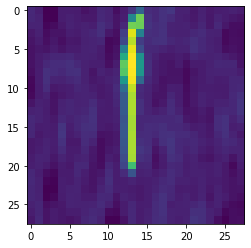

In [23]:
plt.imshow(x_train[0].reshape(28,28))
plt.show()

In [24]:
def get_tensorboard(model_name):
    folder_name = f'model at {strftime("%I %M")}'
    dir_path = os.path.join(LOG_DIR, folder_name)

    try:
        os.makedirs(dir_path)
    except OSError as err:
        print(err.strerror)
    else:
        print("Successfully created the directory %s " % folder_name)

    return TensorBoard(log_dir=dir_path)

In [25]:
Model = Sequential([
    Dense(input_shape=(784,), units=576, activation='relu'),
    Dense(units=288, activation='relu'),
    Dense(units=144, activation='relu'),
    Dense(units=72, activation='relu'),
    Dense(units=36, activation='softmax')])

Model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [26]:
samples_per_batch = 100

In [27]:
%%capture
Model.fit(X_train, y_train, epochs=55, batch_size=samples_per_batch, validation_data=(X_test, y_test), callbacks=[get_tensorboard('Model')])

Successfully created the directory model at 03 37 
Epoch 1/55
6/6 [==============================] - 1s 90ms/step - loss: 3.5392 - accuracy: 0.0541 - val_loss: 3.6238 - val_accuracy: 0.0172
Epoch 2/55
6/6 [==============================] - 0s 9ms/step - loss: 3.3929 - accuracy: 0.0811 - val_loss: 3.3553 - val_accuracy: 0.0345
Epoch 3/55
6/6 [==============================] - 0s 9ms/step - loss: 3.1773 - accuracy: 0.1274 - val_loss: 3.2363 - val_accuracy: 0.1897
Epoch 4/55
6/6 [==============================] - 0s 7ms/step - loss: 2.8346 - accuracy: 0.2568 - val_loss: 3.0396 - val_accuracy: 0.2069
Epoch 5/55
6/6 [==============================] - 0s 9ms/step - loss: 2.3945 - accuracy: 0.3571 - val_loss: 2.7207 - val_accuracy: 0.2931
Epoch 6/55
6/6 [==============================] - 0s 13ms/step - loss: 2.1492 - accuracy: 0.4324 - val_loss: 2.4853 - val_accuracy: 0.3276
Epoch 7/55
6/6 [==============================] - 0s 12ms/step - loss: 1.7440 - accuracy: 0.5347 - val_loss: 2.0262 - v

In [28]:
final_accuracies = Model.evaluate(X_test,y_test,verbose=0)
print('Validation Loss : {:.2f}'.format(final_accuracies[0]))
print('Validation Accuracy: {:.2f}'.format(final_accuracies[1]))

Validation Loss : 0.07
Validation Accuracy: 0.98


In [29]:
# def get_and_solve_img2(path):
#         text_word=''
#         img = cv2.imread(path,0)
#         plt.imshow(img)
#         plt.show()
#         for i in range (4):
#                 input = cv2.imread(path,0)
#                 start_row, start_col = int(input.shape[0]*0.4), int(input.shape[1]*(0+i*0.25))
#                 end_row, end_col = int(input.shape[0]*0.55), int(input.shape[1]*(0.2+ i*0.25))
#                 cropped = input[start_row:end_row, start_col:end_col]
#                 cropped = cv2.medianBlur(cropped,5)
#                 resized = cv2.resize(cropped, (28,28), interpolation = cv2.INTER_AREA)
#                 resized = cv2.bitwise_not(resized)
#                 resized = np.resize(resized, (1,784))
#                 prediction = letters_dict[np.argmax(Model.predict(resized))]
#                 text_word = text_word + str(prediction)
#                 text_word = text_word.lower()
#         return text_word